<a href="https://colab.research.google.com/github/ahmedhassan97/Image-Data-Augmentation-with-Keras/blob/master/Image_Data_Augmentation_with_Keras_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [35]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.2.0-rc3


# Task 2: Rotation

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

In [37]:
#zip file
from zipfile import ZipFile
file_name = "data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


Found 1 images belonging to 1 classes.
(1, 256, 256, 3)
[[[[68.23594  79.23594  62.23594 ]
   [69.88245  80.88245  63.88245 ]
   [67.11881  78.11881  61.11881 ]
   ...
   [53.56174  62.56174  45.56174 ]
   [53.950798 62.950798 45.950798]
   [54.67971  63.67971  46.67971 ]]

  [[68.       79.       62.      ]
   [69.300255 80.300255 63.30025 ]
   [68.28598  79.28598  62.28598 ]
   ...
   [54.965908 63.965908 46.965908]
   [55.744022 64.74402  47.744022]
   [55.216793 63.955727 47.477863]]

  [[68.       79.       62.      ]
   [68.52214  79.52214  62.522137]
   [69.453156 80.453156 63.453156]
   ...
   [54.7875   63.38333  47.191666]
   [53.620327 61.827103 46.41355 ]
   [52.81772  60.81772  45.81772 ]]

  ...

  [[30.       36.       24.      ]
   [30.       36.       24.      ]
   [30.       36.       24.      ]
   ...
   [21.986374 27.986374 17.986374]
   [21.67462  27.67462  17.67462 ]
   [22.595833 28.595833 18.595833]]

  [[30.11839  36.11839  24.11839 ]
   [30.507446 36.507446 24

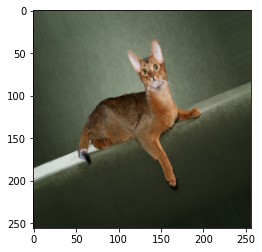

In [38]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
print(x.shape)
print(x)

plt.imshow(x[0].astype('uint16'));

# Task 3: Width and Height Shifts

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50,50]
)

Found 1 images belonging to 1 classes.


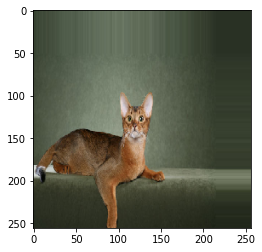

In [9]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


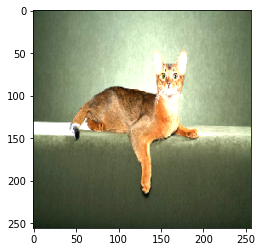

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


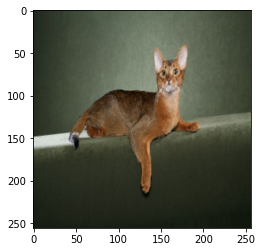

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


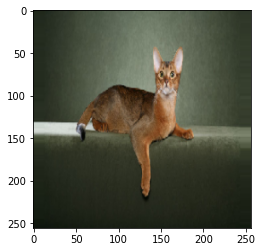

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)


x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


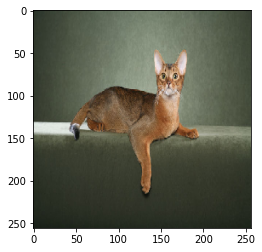

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


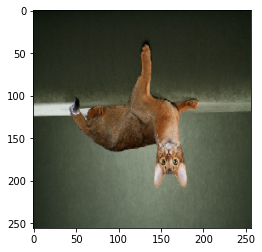

In [23]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 2s 0us/step


In [25]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [40]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x_train.shape)
print(x_test.shape)
print(x.mean(), x.std(), y)
print(x_train.mean())

(50000, 32, 32, 3)
(10000, 32, 32, 3)
163.83333 38.555607 [[7]]
120.70756512369792


### Samplewise

In [41]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

3.973643e-08 0.9999999 [[1]]


# Task 10: Rescale and Preprocessing Function

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rescale=1.
)

In [0]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [30]:
print(x.mean(), x.std(), y)

0.4074091 0.38750806 [[0]]


# Task 11: Using in Model Training

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(32, 32, 3), pooling='avg'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=10, epochs=1
)

10/10 [==============================] - 2s 215ms/step - loss: 3.1582 - accuracy: 0.0844
